<a href="https://colab.research.google.com/github/Icetiger1/python/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%208-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
!pip install tensorflow==2.8.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns. set_style('darkgrid')

#Нейронные сети
from keras import Sequential #последовательная архитектура модели
from keras.layers import (Dense,#полносввязные слои, каждый нейрон с каждым нейроном
                          Dropout, #удаление нейронов случайным образом, прореживание
                          BatchNormalization, #нормализация входного батча
                          )

#Свёрточные слои
from keras.layers import (Conv2D,#свёрточные слои
                          MaxPool2D, #дополнительно извлечение признаков с уменьшением матрицы
                          Flatten #выпрямитель иатриц в вектор, для подачи в полносвязне  слои
                          )

#коллбэки
from keras.callbacks import EarlyStopping

#препроцессинг
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras import utils #OHE от keras
from keras.preprocessing import image
from PIL import Image

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, Adamax

#обёртка для кераса, тобы запускать с кодом sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


#Загрузка данных

In [ ]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 1), reused 1 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 31.42 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
path = '/content/DA_repo/telecom_churn.csv'

In [ ]:
data = pd.read_csv(path)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Анализ данных

##Категориальные признаки

In [ ]:
cat_cols = data.describe(include = 'O').columns.to_list()
cat_data = data[cat_cols]
cat_data.head()

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No


In [ ]:
le = LabelEncoder()
for i in list(cat_data.columns):
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])

cat_data_le = cat_data.drop(cat_cols, axis =1)
cat_data_le.head()

<ipython-input-9-1060b97225cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-9-1060b97225cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-9-1060b97225cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,State_LE,International plan_LE,Voice mail plan_LE
0,16,0,1
1,35,0,1
2,31,0,0
3,35,1,0
4,36,1,0


In [ ]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
data['Churn_LE'] = data['Churn'].map({False: 0,
                                  True : 1})
data['Churn_LE'].value_counts()

0    2850
1     483
Name: Churn_LE, dtype: int64

##Числовые признаки

In [ ]:
num_cols = data.drop('Churn_LE', axis = 1).describe().columns.to_list()
num_data = data[num_cols]

In [ ]:
scaler = StandardScaler()
num_data_scaled = scaler.fit_transform(num_data)
num_data_scaled[:2]

array([[ 0.67648946, -0.52360328,  1.23488274,  1.56676695,  0.47664315,
         1.56703625, -0.07060962, -0.05594035, -0.07042665,  0.86674322,
        -0.46549436,  0.86602851, -0.08500823, -0.60119509, -0.0856905 ,
        -0.42793202],
       [ 0.14906505, -0.52360328,  1.30794844, -0.33373776,  1.12450284,
        -0.33401297, -0.10808036,  0.14486653, -0.10754944,  1.05857074,
         0.14782467,  1.05938994,  1.24048169, -0.60119509,  1.2411686 ,
        -0.42793202]])

In [ ]:
num_data_df = pd.DataFrame(data = num_data_scaled,
                           columns = num_cols)
num_data_df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


##Итоговый датасет

In [ ]:
dataset = pd.concat([cat_data_le, num_data_df], axis =1)
dataset.head()

,State_LE,International plan_LE,Voice mail plan_LE,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,0,1,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,35,0,1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,31,0,0,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,35,1,0,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,36,1,0,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [ ]:
scaler = StandardScaler()
dataset_st = scaler.fit_transform(dataset)
dataset_st[:2]

#X y , train test split

In [ ]:
y = np.array(data['Churn_LE'])
X = np.array(dataset)

In [ ]:
y[:2]

array([0, 0])

In [ ]:
X[:2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 19)
(667, 19)
(2666,)
(667,)


In [ ]:
y_train.shape

(2666,)

#Dense полносвязныеслои

Epoch 1/1000
21/21 [==============================] - 2s 17ms/step - loss: 0.5652 - accuracy: 0.1433 - val_loss: 0.5211 - val_accuracy: 0.1514
Epoch 2/1000
21/21 [==============================] - 0s 7ms/step - loss: 0.4970 - accuracy: 0.1433 - val_loss: 0.4793 - val_accuracy: 0.1514
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4724 - accuracy: 0.1433 - val_loss: 0.4711 - val_accuracy: 0.1514
Epoch 4/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.1433 - val_loss: 0.4666 - val_accuracy: 0.1514
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4620 - accuracy: 0.1433 - val_loss: 0.4607 - val_accuracy: 0.1514
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.1433 - val_loss: 0.4533 - val_accuracy: 0.1514
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4485 - accuracy: 0.1433 - val_loss: 0.4471 - val_accuracy: 0.1514
Epoch

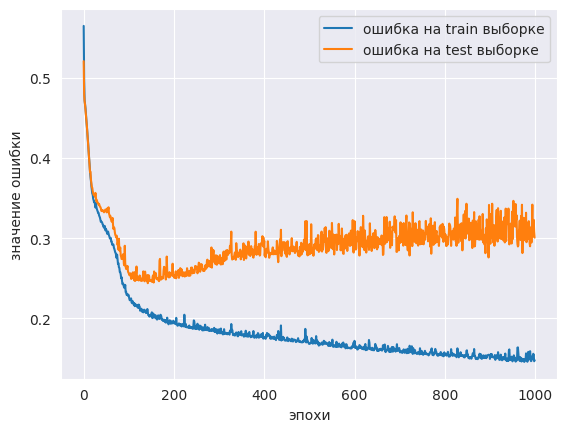

In [ ]:
#инициализация модели
model = Sequential()
#Входной слой
model.add(Dense(10, input_dim = 19, activation = 'relu'))
#скрытый слой 1
model.add(Dense(8, activation = 'relu'))
#скрытый слой 2
model.add(Dense(4, activation = 'relu'))
#скрытый слой 3
model.add(Dense(3, activation = 'relu'))
#выходной слой , кол-во нейронов = кол-ву классов
model.add(Dense(1, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics  = ['accuracy'])

#обучение модели
history = model.fit(X_train, y_train,
          batch_size = 132,  #кучосек данных, который подаётся за в модельза раз, после этого обновляются веса
          epochs = 1000, #кол-во раз, сколько раз прошли по датасету
          validation_data = (X_test, y_test), #тестовая выборка
          verbose = 1)#вывод логов обчения

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

#Борьба с переобучением

Epoch 1/1000
21/21 [==============================] - 6s 13ms/step - loss: 0.5746 - accuracy: 0.1433 - val_loss: 0.4612 - val_accuracy: 0.1514
Epoch 2/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.5044 - accuracy: 0.1433 - val_loss: 0.4472 - val_accuracy: 0.1514
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4845 - accuracy: 0.1433 - val_loss: 0.4379 - val_accuracy: 0.1514
Epoch 4/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.1433 - val_loss: 0.4204 - val_accuracy: 0.1514
Epoch 5/1000
21/21 [==============================] - 0s 7ms/step - loss: 0.4353 - accuracy: 0.1433 - val_loss: 0.4147 - val_accuracy: 0.1514
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.1433 - val_loss: 0.3947 - val_accuracy: 0.1514
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.3991 - accuracy: 0.1433 - val_loss: 0.3785 - val_accuracy: 0.1514
Epoch

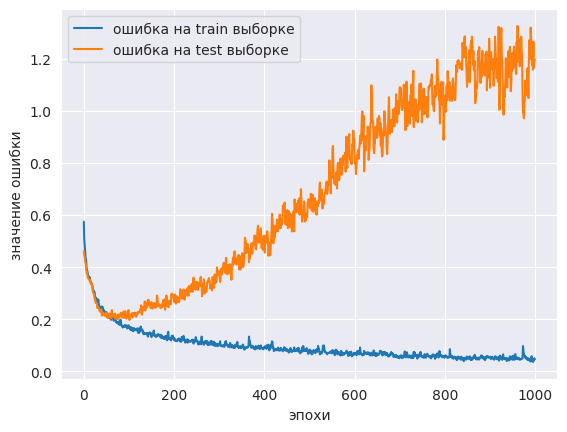

In [ ]:
#инициализация модели
model = Sequential()
#Входной слой
model.add(Dense(64, input_dim = 19, activation = 'relu'))
#скрытый слой 1
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.33))
#скрытый слой 2
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
#скрытый слой 3
model.add(Dense(8, activation = 'relu'))
#выходной слой , кол-во нейронов = кол-ву классов
model.add(Dense(1, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics  = ['acc'])

#обучение модели
history = model.fit(X_train, y_train,
          batch_size = 132,  #кучосек данных, который подаётся за в модельза раз, после этого обновляются веса
          epochs = 1000, #кол-во раз, сколько раз прошли по датасету
          validation_data = (X_test, y_test), #тестовая выборка
          verbose = 1)#вывод логов обчения

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

#Multiclassificaton

In [ ]:
len(data)

3333

In [ ]:
import random
new_y = []
for i in range(len(data)):
  new_y.append(random.randrange(0,3))

#new_y[:100]


In [ ]:
new_y.shape

In [ ]:
data['new_y'] = new_y

In [ ]:
data['new_y'][:5]

0    2
1    1
2    1
3    1
4    0
Name: new_y, dtype: int64

In [ ]:
y_ma = pd.DataFrame(data['new_y'])
ohe = OneHotEncoder()
y_ohe = ohe.fit(y_ma)
y_multi_ohe = y_ohe.transform(y_ma).toarray()


In [ ]:
y_multi[:5]

[2, 1, 0, 1, 2]

In [ ]:
y_multi_ohe[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi_ohe,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 19)
(667, 19)
(2666, 3)
(667, 3)


Epoch 1/100
21/21 [==============================] - 1s 14ms/step - loss: 0.6635 - accuracy: 0.3263 - val_loss: 0.6591 - val_accuracy: 0.3283
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.3271 - val_loss: 0.6553 - val_accuracy: 0.3298
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.3278 - val_loss: 0.6520 - val_accuracy: 0.3328
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.3338 - val_loss: 0.6491 - val_accuracy: 0.3373
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.3368 - val_loss: 0.6466 - val_accuracy: 0.3298
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6459 - accuracy: 0.3372 - val_loss: 0.6444 - val_accuracy: 0.3343
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.3346 - val_loss: 0.6424 - val_accuracy: 0.3283
Epoch 8/100


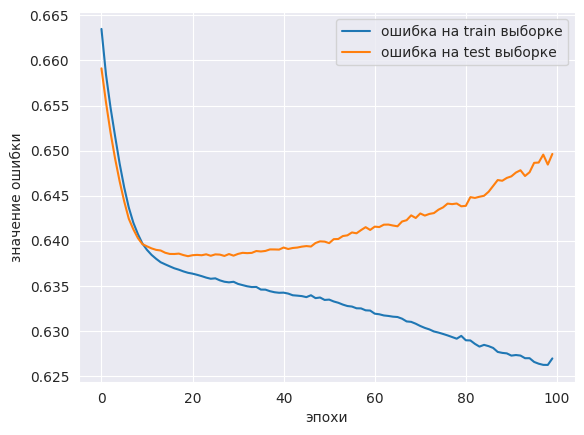

In [ ]:
#инициализация модели
model = Sequential()
#Входной слой
model.add(Dense(10, input_dim = 19, activation = 'relu'))
#скрытый слой 1
model.add(Dense(8, activation = 'relu'))
#скрытый слой 2
model.add(Dense(4, activation = 'relu'))
#скрытый слой 3
model.add(Dense(3, activation = 'relu'))
#выходной слой , кол-во нейронов = кол-ву классов
model.add(Dense(3, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics  = ['accuracy'])

#обучение модели
history = model.fit(X_train, y_train,
          batch_size = 132,  #кучосек данных, который подаётся за в модельза раз, после этого обновляются веса
          epochs = 100, #кол-во раз, сколько раз прошли по датасету
          validation_data = (X_test, y_test), #тестовая выборка
          verbose = 1)#вывод логов обчения

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

#Прогнозы моделей

In [ ]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 129ms/step


array([[0.31162453, 0.347024  , 0.3413515 ],
       [0.3047638 , 0.3605386 , 0.33469754],
       [0.31270292, 0.34490407, 0.34239295],
       [0.30484822, 0.36037204, 0.3347797 ],
       [0.3044644 , 0.36112946, 0.33440608]], dtype=float32)

In [ ]:
y_ohe.inverse_transform(y_pred)

array([[1],
       [1],
       [1],
       [1],
       [1]])

#Conv2D Свёртоные слои

##загрузка данных

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

In [ ]:
X_train[10].shape

(32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
[1,2,2,,4,23,4,45,5]
Conv1D( (3))

In [ ]:
X_train[10]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

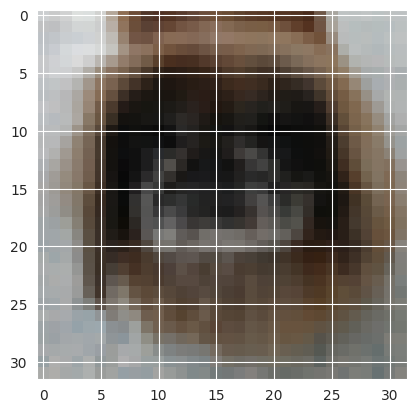

In [ ]:
plt.imshow(X_train[999])
plt.show()

###Создаем классы целевой переменной

In [ ]:
class_list = ['airplane', 'automobile',
              'bird', 'cat', 'deer', 'dog', 'frog',
              'horse', 'ship', 'truck']

In [ ]:
y_train[10]

array([4], dtype=uint8)

In [ ]:
class_list[4]

'deer'

##Подготовка цеевой пперменной OHE

In [ ]:
y_train_ohe = utils.to_categorical(y_train, 10)
y_test_ohe = utils.to_categorical(y_test, 10)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

##conv2D архитектура

Epoch 1/20
125/125 [==============================] - 5s 14ms/step - loss: 1.6022 - accuracy: 0.4257 - val_loss: 1.3385 - val_accuracy: 0.5219
Epoch 2/20
125/125 [==============================] - 2s 12ms/step - loss: 1.1403 - accuracy: 0.5959 - val_loss: 1.0835 - val_accuracy: 0.6185
Epoch 3/20
125/125 [==============================] - 1s 12ms/step - loss: 0.9605 - accuracy: 0.6639 - val_loss: 0.9821 - val_accuracy: 0.6583
Epoch 4/20
125/125 [==============================] - 2s 12ms/step - loss: 0.8205 - accuracy: 0.7141 - val_loss: 0.9301 - val_accuracy: 0.6780
Epoch 5/20
125/125 [==============================] - 2s 12ms/step - loss: 0.7273 - accuracy: 0.7495 - val_loss: 0.9320 - val_accuracy: 0.6852
Epoch 6/20
125/125 [==============================] - 2s 12ms/step - loss: 0.6445 - accuracy: 0.7782 - val_loss: 0.9103 - val_accuracy: 0.6972
Epoch 7/20
125/125 [==============================] - 2s 13ms/step - loss: 0.5515 - accuracy: 0.8099 - val_loss: 0.9348 - val_accuracy: 0.6905

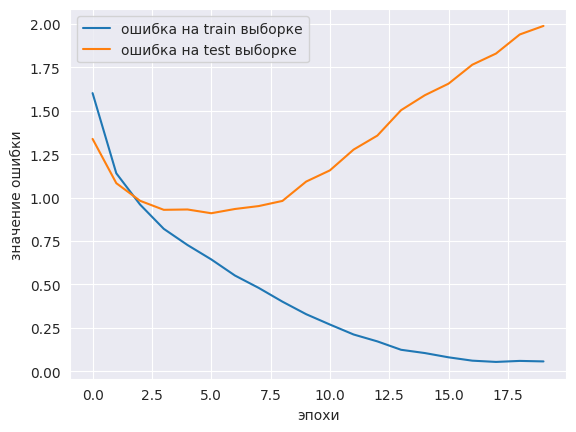

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape = (32, 32, 3))) #нормализация входного атча

model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D((2, 2))) #Слой пулинга, для дополнительного извлечения важных признаков
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(Flatten()) #выпрямление в вектор, чтобы работать с Dense слоями
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

#обучение
history = model.fit(X_train, y_train_ohe,
                    batch_size=400,
                    epochs=  20,
                    validation_data = (X_test, y_test_ohe),
                    verbose = 1)

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 32, 32, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_7 (Dense)             (None, 64)               

#Классификация фото из интернета (predict)

In [ ]:
!wget https://proprikol.ru/wp-content/uploads/2020/12/kartinki-ryzhih-kotov-9.jpg

--2023-10-21 08:48:05--  https://proprikol.ru/wp-content/uploads/2020/12/kartinki-ryzhih-kotov-9.jpg
Resolving proprikol.ru (proprikol.ru)... 89.108.99.28
Connecting to proprikol.ru (proprikol.ru)|89.108.99.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461052 (450K) [image/jpeg]
Saving to: ‘kartinki-ryzhih-kotov-9.jpg’

kartinki-ryzhih-kot 100%[===================>] 450.25K   436KB/s    in 1.0s    

2023-10-21 08:48:07 (436 KB/s) - ‘kartinki-ryzhih-kotov-9.jpg’ saved [461052/461052]



In [ ]:
!wget https://wp-s.ru/wallpapers/5/15/481641983153237/polosatyj-kot-lezhit-i-smotrit.jpg

--2023-10-21 09:06:44--  https://wp-s.ru/wallpapers/5/15/481641983153237/polosatyj-kot-lezhit-i-smotrit.jpg
Resolving wp-s.ru (wp-s.ru)... 82.202.230.6
Connecting to wp-s.ru (wp-s.ru)|82.202.230.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304733 (298K) [image/jpeg]
Saving to: ‘polosatyj-kot-lezhit-i-smotrit.jpg’

polosatyj-kot-lezhi 100%[===================>] 297.59K   435KB/s    in 0.7s    

2023-10-21 09:06:46 (435 KB/s) - ‘polosatyj-kot-lezhit-i-smotrit.jpg’ saved [304733/304733]



In [ ]:
path_img = '/content/polosatyj-kot-lezhit-i-smotrit.jpg'

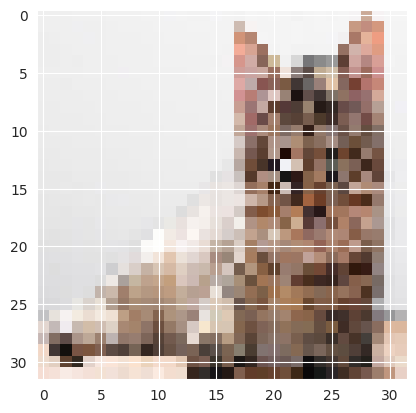

In [ ]:
#Загружаем картинку + задачём размер, который ожидает нейронка
img_cat = image.load_img(path_img, target_size=(32, 32, 3))
plt.imshow(img_cat)
plt.show()

In [ ]:
#Преобразование в массив
img_cat_x = image.img_to_array(img_cat)
#добавление еще одно измерения (не модели)
img_cat_x = np.expand_dims(img_cat_x, axis = 0 )
img_cat_x.shape

(1, 32, 32, 3)

In [ ]:
predict = model.predict(img_cat_x)
predict

1/1 [==============================] - 0s 21ms/step


array([[3.1527718e-05, 1.6235403e-04, 9.8508966e-01, 7.2320347e-04,
        4.2739463e-05, 6.6444038e-05, 8.4114826e-04, 2.1430100e-03,
        1.3654869e-05, 1.0886305e-02]], dtype=float32)

In [ ]:
class_list[np.argmax(predict)]

'bird'

#борьба с переобучением

###dropout

Epoch 1/20
125/125 [==============================] - 4s 15ms/step - loss: 1.7480 - accuracy: 0.3617 - val_loss: 1.4933 - val_accuracy: 0.4459
Epoch 2/20
125/125 [==============================] - 2s 12ms/step - loss: 1.3940 - accuracy: 0.4959 - val_loss: 1.1893 - val_accuracy: 0.5767
Epoch 3/20
125/125 [==============================] - 2s 14ms/step - loss: 1.2400 - accuracy: 0.5545 - val_loss: 1.0722 - val_accuracy: 0.6170
Epoch 4/20
125/125 [==============================] - 2s 14ms/step - loss: 1.1317 - accuracy: 0.5986 - val_loss: 1.0192 - val_accuracy: 0.6411
Epoch 5/20
125/125 [==============================] - 2s 14ms/step - loss: 1.0445 - accuracy: 0.6273 - val_loss: 0.9496 - val_accuracy: 0.6664
Epoch 6/20
125/125 [==============================] - 2s 12ms/step - loss: 0.9597 - accuracy: 0.6609 - val_loss: 0.9297 - val_accuracy: 0.6769
Epoch 7/20
125/125 [==============================] - 2s 13ms/step - loss: 0.9089 - accuracy: 0.6762 - val_loss: 0.9031 - val_accuracy: 0.6871

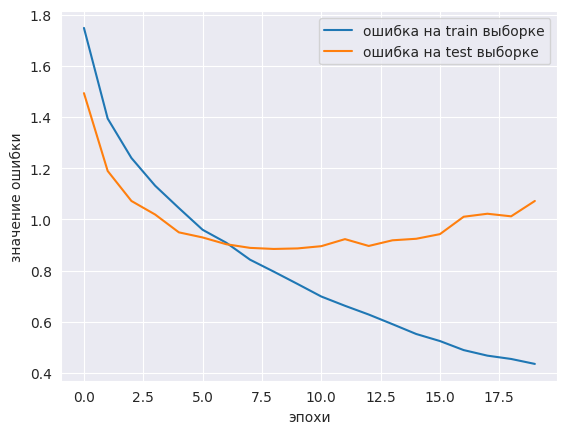

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape = (32, 32, 3))) #нормализация входного атча

model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D((2, 2))) #Слой пулинга, для дополнительного извлечения важных признаков
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(Flatten()) #выпрямление в вектор, чтобы работать с Dense слоями
model.add(Dense(64, activation='relu'))
#дропаут
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

#обучение
history = model.fit(X_train, y_train_ohe,
                    batch_size=400,
                    epochs=  20,
                    validation_data = (X_test, y_test_ohe),
                    verbose = 1)

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

###BatchNormalization

Epoch 1/20
125/125 [==============================] - 7s 30ms/step - loss: 1.6315 - accuracy: 0.4534 - val_loss: 2.1513 - val_accuracy: 0.3314
Epoch 2/20
125/125 [==============================] - 3s 27ms/step - loss: 1.0891 - accuracy: 0.6209 - val_loss: 1.9240 - val_accuracy: 0.4738
Epoch 3/20
125/125 [==============================] - 3s 24ms/step - loss: 0.8830 - accuracy: 0.6901 - val_loss: 1.5773 - val_accuracy: 0.6073
Epoch 4/20
125/125 [==============================] - 3s 25ms/step - loss: 0.7358 - accuracy: 0.7393 - val_loss: 1.1243 - val_accuracy: 0.6591
Epoch 5/20
125/125 [==============================] - 3s 25ms/step - loss: 0.6180 - accuracy: 0.7808 - val_loss: 0.9214 - val_accuracy: 0.6837
Epoch 6/20
125/125 [==============================] - 3s 25ms/step - loss: 0.5142 - accuracy: 0.8183 - val_loss: 0.9464 - val_accuracy: 0.6874
Epoch 7/20
125/125 [==============================] - 3s 26ms/step - loss: 0.4323 - accuracy: 0.8459 - val_loss: 0.9724 - val_accuracy: 0.7017

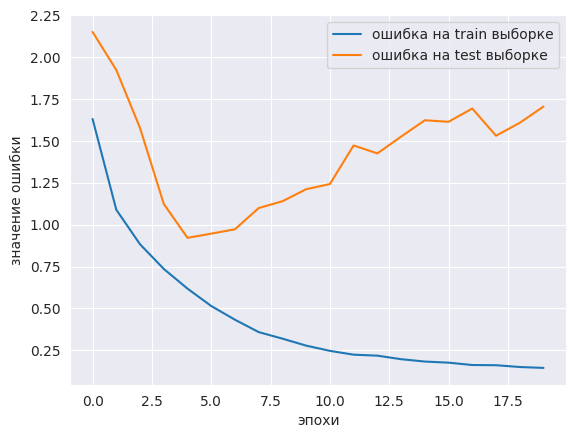

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape = (32, 32, 3))) #нормализация входного атча
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D((2, 2))) #Слой пулинга, для дополнительного извлечения важных признаков
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
model.add(Flatten()) #выпрямление в вектор, чтобы работать с Dense слоями
#Дополнительная нормализация
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
#дропаут
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

#обучение
history = model.fit(X_train, y_train_ohe,
                    batch_size=400,
                    epochs=  20,
                    validation_data = (X_test, y_test_ohe),
                    verbose = 1)

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

###early stoppiing

Epoch 1/20
125/125 [==============================] - 16s 40ms/step - loss: 1.7574 - accuracy: 0.4151 - val_loss: 2.1500 - val_accuracy: 0.3266
Epoch 2/20
125/125 [==============================] - 3s 28ms/step - loss: 1.1668 - accuracy: 0.5900 - val_loss: 1.9396 - val_accuracy: 0.4666
Epoch 3/20
125/125 [==============================] - 3s 27ms/step - loss: 0.9494 - accuracy: 0.6691 - val_loss: 1.5626 - val_accuracy: 0.6038
Epoch 4/20
125/125 [==============================] - 4s 29ms/step - loss: 0.7896 - accuracy: 0.7240 - val_loss: 1.1021 - val_accuracy: 0.6633
Epoch 5/20
125/125 [==============================] - 3s 27ms/step - loss: 0.6640 - accuracy: 0.7677 - val_loss: 0.9178 - val_accuracy: 0.6869
Epoch 6/20
125/125 [==============================] - 3s 26ms/step - loss: 0.5692 - accuracy: 0.8001 - val_loss: 0.9332 - val_accuracy: 0.6985
Epoch 7/20
125/125 [==============================] - 3s 26ms/step - loss: 0.4748 - accuracy: 0.8338 - val_loss: 1.0766 - val_accuracy: 0.679

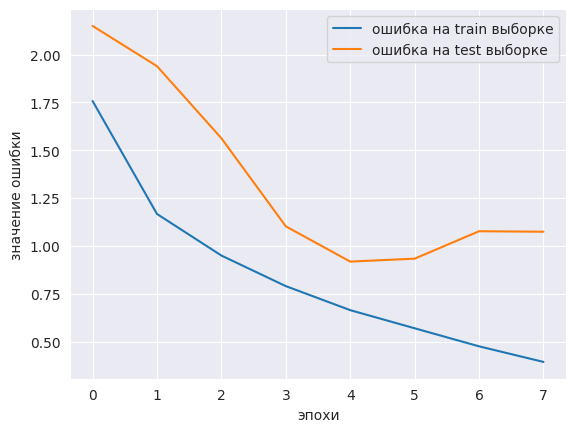

In [ ]:
from keras.src.backend import eager_learning_phase_scope
model = Sequential()
model.add(BatchNormalization(input_shape = (32, 32, 3))) #нормализация входного атча
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D((2, 2))) #Слой пулинга, для дополнительного извлечения важных признаков
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
model.add(Flatten()) #выпрямление в вектор, чтобы работать с Dense слоями
#Дополнительная нормализация
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
#дропаут
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#компилируем модель
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

#early stopping - условия отработки
es = EarlyStopping(monitor= 'val_loss',
                   mode = 'min',
                   patience=3,
                   verbose =1)


#обучение
history = model.fit(X_train, y_train_ohe,
                    batch_size=400,
                    epochs=  20,
                    validation_data = (X_test, y_test_ohe),
                    verbose = 1,
                    callbacks = [es]) #добавили callback

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

#работа с GPU

In [ ]:
'''
1. уствновка карты
2. drivers сверсией выше 500
3. установить CUDA драйвера
'''

In [ ]:
!nvidia-smi #информация о дстпупнх GPU через терминал линус

Sat Oct 21 09:33:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |   4979MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
print(f'Кол-во доступных GPU = {tf.config.list_physical_devices("GPU")}')

Кол-во доступных GPU = [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#Запускаем на GPU с указанием устройства

Epoch 1/20
334/334 [==============================] - 6s 16ms/step - loss: 0.5976 - accuracy: 0.7961 - val_loss: 1.5304 - val_accuracy: 0.6295
Epoch 2/20
334/334 [==============================] - 5s 14ms/step - loss: 0.4732 - accuracy: 0.8351 - val_loss: 1.2547 - val_accuracy: 0.6869
Epoch 3/20
334/334 [==============================] - 5s 14ms/step - loss: 0.3728 - accuracy: 0.8707 - val_loss: 1.2809 - val_accuracy: 0.6874
Epoch 4/20
334/334 [==============================] - 5s 16ms/step - loss: 0.3087 - accuracy: 0.8911 - val_loss: 1.3584 - val_accuracy: 0.6940
Epoch 5/20
334/334 [==============================] - 5s 14ms/step - loss: 0.2745 - accuracy: 0.9030 - val_loss: 1.4386 - val_accuracy: 0.6816
Epoch 5: early stopping


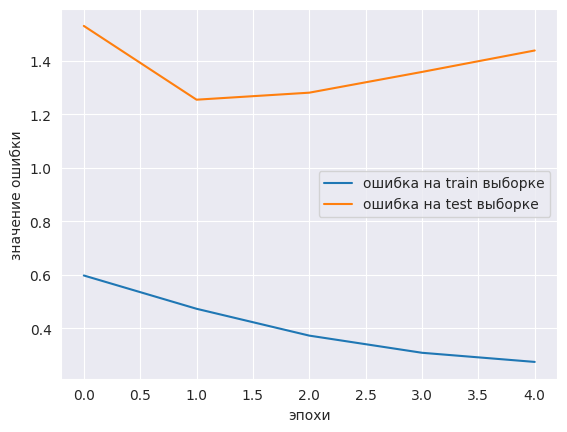

In [ ]:
with tf.device('/device:GPU:0'):
  #обучение
  history = model.fit(X_train, y_train_ohe,
                      batch_size=150,
                      epochs=  20,
                      validation_data = (X_test, y_test_ohe),
                      verbose = 1,
                      callbacks = [es]) #добавили callback

#визуализация
plt.plot(history.history['loss'],
         label = 'ошибка на train выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на test выборке')
plt.xlabel('эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

#подбор гиперпараметров сети с помощью gridsearch

In [ ]:
y_train[1]

1

In [ ]:
def create_model(learning_rate = 0.001, #шаг градиетого спуска
                 optimizer= Adam,
                 layer_neurons_1 = 10,
                 activation = 'relu',
                 dropout =0.05,
                 dim = 19

                 ):

  model = Sequential()
  model.add(Dense(layer_neurons_1, input_dim = dim, activation=activation))
  model.add(Dropout(dropout))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  #компилируем модель
  model.compile(loss = 'binary_crossentropy',
                optimizer = optimizer(learning_rate),
                metrics = ['acc'])
  return model

#подключаем keras  к  gridsearch
model = KerasClassifier(build_fn=create_model, verbose = 1)
param_grid = {'batch_size' :[400, 600],
              'epochs':[20,15],
              'optimizer' : [Adam, Adamax],
              'layer_neurons_1': [15,30,60],
              'activation' : ['relu','elu'],
              'dropout' : [0.1, 0.2, 0.3]}

#grid
grid = GridSearchCV(estimator = model,
                    param_grid =param_grid,
                    cv = 5)
#grid fit
result_grid = grid.fit(X_train, y_train)
#лучшие значени
print(f'best_score = {result_grid.best_score_}')
print(f'best_params = {result_grid.best_params_}')

means = result_grid.cv_results_['params']
params = result_grid.cv_results_['mean_test_score']
for i,k in zip(means, params):
  print(i, k)

<ipython-input-19-6fb405147b2b>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose = 1)


Epoch 1/20
6/6 [==============================] - 1s 4ms/step - loss: 1.4447 - acc: 0.2964
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 0.9599 - acc: 0.4906
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 0.7021 - acc: 0.6801
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6537 - acc: 0.7533
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6422 - acc: 0.7692
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6355 - acc: 0.7842
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6014 - acc: 0.7927
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5758 - acc: 0.8021
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5675 - acc: 0.7960
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5736 - acc: 0.7932
Epoch 11/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5648 - acc: 0.79

2/2 [==============================] - 0s 8ms/step - loss: 0.4206 - acc: 0.8405
Epoch 1/20
6/6 [==============================] - 0s 4ms/step - loss: 8.0184 - acc: 0.1459
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 6.8818 - acc: 0.1454
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 5.8638 - acc: 0.1477
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 4.9246 - acc: 0.1524
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 4.1050 - acc: 0.1623
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 3.2530 - acc: 0.1689
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 2.4833 - acc: 0.1984
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 1.8260 - acc: 0.2556
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 1.3166 - acc: 0.3114
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.9687 - acc: 0.4967
Epoch 11/

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 6ms/step - loss: 0.5011 - acc: 0.8134
Epoch 8/15
4/4 [==============================] - 0s 6ms/step - loss: 0.5027 - acc: 0.8158
Epoch 9/15
4/4 [==============================] - 0s 6ms/step - loss: 0.4917 - acc: 0.8200
Epoch 10/15
4/4 [==============================] - 0s 6ms/step - loss: 0.4980 - acc: 0.8186
Epoch 11/15
4/4 [==============================] - 0s 8ms/step - loss: 0.4681 - acc: 0.8359
Epoch 12/15
4/4 [==============================] - 0s 7ms/step - loss: 0.4741 - acc: 0.8214
Epoch 13/15
4/4 [==============================] - 0s 6ms/step - loss: 0.4599 - acc: 0.8331
Epoch 14/15
4/4 [==============================] - 0s 6ms/step - loss: 0.4555 - acc: 0.8293
Epoch 15/15
1/1 [==============================] - 0s 237ms/step - loss: 0.4319 - acc: 0.8405
Epoch 1/15
4/4 [==============================] - 1s 9ms/step - loss: 0.5441 - acc: 0.7655
Epoch 2/15
4/4 [==========================

NameError: ignored